In [1]:
import numpy as np
from matplotlib import pyplot as plt

# declare some pretty colors
orange = '#f99931'
blue = '#76b5ed'
pink = '#eda1ed'

# make results reproducible
np.random.seed(1)

# Logistic Regression

We'll start by generating $N$ 2-dimensional data points from each cluster, plus one additional point in the second cluster.

In [2]:
N = 200 # number of points per cluster
c1 = np.random.randn(2,N)
c2 = 5 + np.random.randn(2,N)
new = 5 + np.random.randn(2)

Next we'll generate two plots. First, a scatter plot of the data. Second, a scatter plot of the data with a line to project on and a separating line.

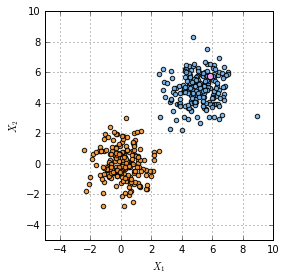

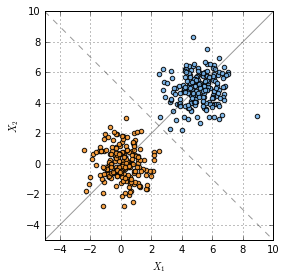

In [3]:
plt.scatter(c1[0,:],c1[1,:],c=orange,alpha=0.9)
plt.scatter(c2[0,:],c2[1,:],c=blue,alpha=0.9)
plt.scatter(new[0],new[1],c=pink,s=40)
plt.xlim([-5,10])
plt.ylim([-5,10])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid('on')
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.savefig('./logreg1.png',dpi=200)
plt.show()

plt.plot([-5,10],[10,-5],'k--',alpha=0.4)
plt.plot([-5,10],[-5,10],'k',alpha=0.4)
plt.scatter(c1[0,:],c1[1,:],c=orange,alpha=0.9)
plt.scatter(c2[0,:],c2[1,:],c=blue,alpha=0.9)
plt.xlim([-5,10])
plt.ylim([-5,10])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid('on')
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.savefig('./logreg2.png',dpi=200)
plt.show()

Next we'll project the data onto the line.

In [4]:
w = np.asarray([1,1])
p1 = np.dot(w.T,c1)
p2 = np.dot(w.T,c2)

And plot it on a number line.

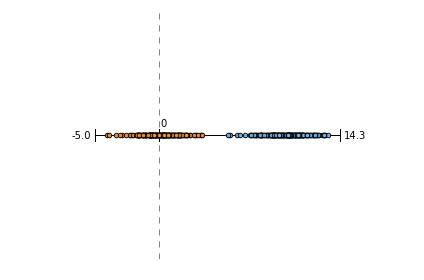

In [5]:
xmin = np.min(p1)-1
xmax = np.max(p2)+1
ydif = 1
plt.plot([xmin,xmax],[0,0],'k',zorder=0)
plt.plot([xmin,xmin],[-ydif,ydif],'k',zorder=0)
plt.plot([xmax,xmax],[-ydif,ydif],'k',zorder=0)
plt.plot([0,0],[-ydif,ydif],'k',zorder=0)
plt.plot([0,0],[-20*ydif,20*ydif],'k--',zorder=0,alpha=0.5)
plt.scatter(p1,np.zeros_like(p1),c=orange,alpha=0.9)
plt.scatter(p2,np.zeros_like(p2),c=blue,alpha=0.9)
plt.axis('off')
plt.ylim([-20*ydif,20*ydif])
plt.tight_layout()
plt.text(xmin-0.3, -ydif/2, str(xmin)[0:4], horizontalalignment='right')
plt.text(xmax+0.3, -ydif/2, str(xmax)[0:4], horizontalalignment='left')
plt.text(0.1, ydif+0.5, '0', horizontalalignment='left')
plt.savefig('./logreg3.png',dpi=200)
plt.show()

In [6]:
bias = -5
p1 += bias
p2 += bias

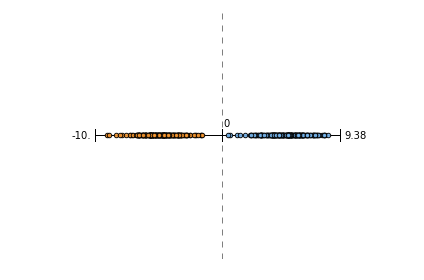

In [7]:
xmin = np.min(p1)-1
xmax = np.max(p2)+1
ydif = 1
plt.plot([xmin,xmax],[0,0],'k',zorder=0)
plt.plot([xmin,xmin],[-ydif,ydif],'k',zorder=0)
plt.plot([xmax,xmax],[-ydif,ydif],'k',zorder=0)
plt.plot([0,0],[-ydif,ydif],'k',zorder=0)
plt.plot([0,0],[-20*ydif,20*ydif],'k--',zorder=0,alpha=0.5)
plt.scatter(p1,np.zeros_like(p1),c=orange,alpha=0.9)
plt.scatter(p2,np.zeros_like(p2),c=blue,alpha=0.9)
plt.axis('off')
plt.ylim([-20*ydif,20*ydif])
plt.tight_layout()
plt.text(xmin-0.3, -ydif/2, str(xmin)[0:4], horizontalalignment='right')
plt.text(xmax+0.3, -ydif/2, str(xmax)[0:4], horizontalalignment='left')
plt.text(0.1, ydif+0.5, '0', horizontalalignment='left')
plt.savefig('./logreg4.png',dpi=200)
plt.show()

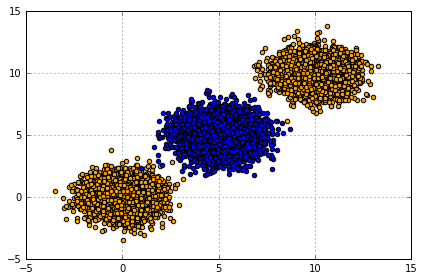

In [2]:
N = 5000
i = 0
c1_xs_1 = np.random.randn(N//2)
c1_ys_1 = np.random.randn(N//2)
c1_xs_2 = 10 + np.random.randn(N//2)
c1_ys_2 = 10 + np.random.randn(N//2)
c1_xs = np.hstack((c1_xs_1,c1_xs_2))
c1_ys = np.hstack((c1_ys_1,c1_ys_2))

c2_xs = 5 + np.random.randn(N)
c2_ys = 5 + np.random.randn(N)

plt.scatter(c1_xs,c1_ys,c=orange)
plt.scatter(c2_xs,c2_ys,c=blue)
plt.grid('on')
plt.tight_layout()
plt.savefig('LRE%i.png'%i)
i += 1
plt.show()

Store data as a matrix

In [3]:
xs = np.hstack((c1_xs,c2_xs))
ys = np.hstack((c1_ys,c2_ys))
bias = np.ones(N*2)
samples = np.vstack((bias,xs,ys)).T
print(xs.shape)
print(ys.shape)

(10000,)
(10000,)


Project onto the first line and activate

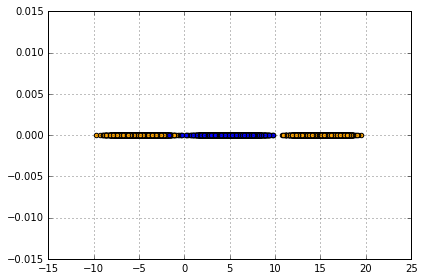

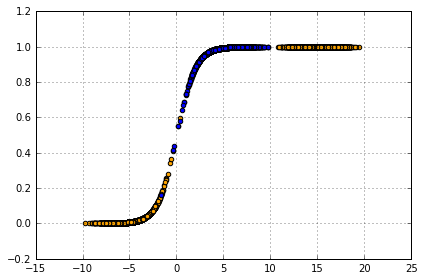

In [4]:
w1 = np.asarray([-5,1,1])
p1 = np.dot(samples,w1)
plt.scatter(p1[:N],[0]*N,c=orange)
plt.scatter(p1[N:],[0]*N,c=blue)
plt.grid('on')
plt.tight_layout()
plt.savefig('LRE%i.png'%i)
i += 1
plt.show()

a1 =  1/(1+np.exp(-p1))
plt.scatter(p1[:N],a1[:N],c=orange)
plt.scatter(p1[N:],a1[N:],c=blue)
plt.grid('on')
plt.tight_layout()
plt.savefig('LRE%i.png'%i)
i += 1
plt.show()

Project onto the second line and activate

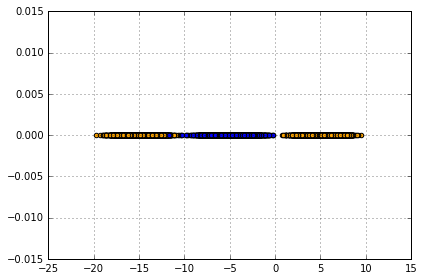

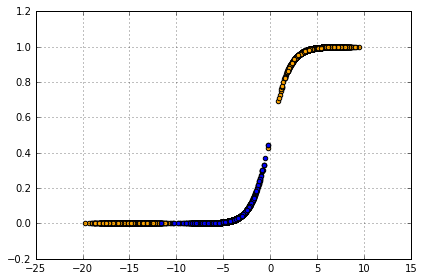

In [5]:
w2 = np.asarray([-15,1,1])
p2 = np.dot(samples,w2)
plt.scatter(p2[:N],[0]*N,c=orange)
plt.scatter(p2[N:],[0]*N,c=blue)
plt.grid('on')
plt.tight_layout()
plt.savefig('LRE%i.png'%i)
i += 1
plt.show()

a2 =  1/(1+np.exp(-p2))
plt.scatter(p2[:N],a2[:N],c=orange)
plt.scatter(p2[N:],a2[N:],c=blue)
plt.grid('on')
plt.tight_layout()
plt.savefig('LRE%i.png'%i)
i += 1
plt.show()

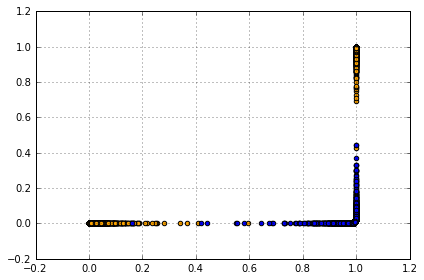

In [6]:
plt.scatter(a1[:N],a2[:N],c=orange)
plt.scatter(a1[N:],a2[N:],c=blue)
plt.grid('on')
plt.tight_layout()
plt.savefig('LRE%i.png'%i)
i += 1
plt.show()

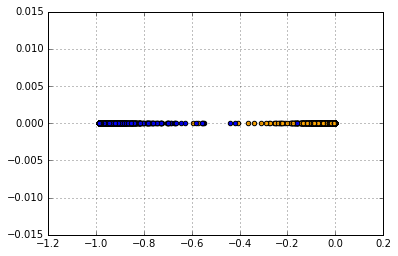

In [7]:
a = np.vstack((a1,a2))
w_ = np.asarray([-1,1])
o = np.dot(w_.T,a).tolist()

plt.scatter(o[:N],[0]*N,c=orange)
plt.scatter(o[N:],[0]*N,c=blue)
plt.grid('on')
plt.show()

In [8]:
from keras.models import Model,load_model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten # all the various neural network layers
from keras.utils import np_utils # utilities for one-hot encoding of ground truth value
from keras.optimizers import RMSprop # optimization algorithm to use to search for optimal weights
from keras import regularizers # used to regularize the weights

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img # for data augmentation

import keras.backend as K # used for modifying learning rate

Using TensorFlow backend.


In [11]:
inp = Input(shape=(2,))
hidden = Dense(2, activation='sigmoid')(inp)
out = Dense(1, activation='sigmoid')(hidden)

model = Model(inputs=inp, outputs=out) 

rms_prop = RMSprop(lr=0.00001)

model.compile(loss='binary_crossentropy',optimizer=rms_prop,metrics=['accuracy'])

In [12]:
X = np.vstack((xs,ys)).T
labels = np.asarray([0]*N + [1]*N)
results = model.fit(X,labels,batch_size=10,epochs=10000,verbose=0)

KeyboardInterrupt: 

In [92]:
ests = model.predict(X)
label_ests = ests > 0.5
print(label_ests.sum())

4997


In [13]:
N_test = 100
i = 0
c1_xs_1_test = np.random.randn(N_test//2)
c1_ys_1_test = np.random.randn(N_test//2)
c1_xs_2_test = 10 + np.random.randn(N_test//2)
c1_ys_2_test = 10 + np.random.randn(N_test//2)
c1_xs_test = np.hstack((c1_xs_1_test,c1_xs_2_test))
c1_ys_test = np.hstack((c1_ys_1_test,c1_ys_2_test))

c2_xs_test = 5 + np.random.randn(N_test)
c2_ys_test = 5 + np.random.randn(N_test)

xs_test = np.hstack((c1_xs_test,c2_xs_test))
ys_test = np.hstack((c1_ys_test,c2_ys_test))

X_test = np.vstack((xs_test,ys_test)).T
labels_test = np.asarray([0]*N_test + [1]*N_test)


In [14]:
model = load_model('3cluster.h5')

In [15]:
ests_test = model.predict(X_test)
label_ests_test = ests_test > 0.5
print(label_ests_test.sum())

100


In [16]:
hidden_model = Model(inputs=model.input,
                    outputs=model.layers[1].output)
hidden_out = hidden_model.predict(X_test)
print(hidden_out.shape)

(200, 2)


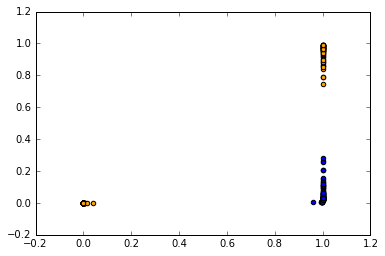

In [17]:
plt.scatter(hidden_out[:100,0],hidden_out[:100,1],c=orange)
plt.scatter(hidden_out[100:,0],hidden_out[100:,1],c=blue)
plt.show()

In [24]:
print(model.layers[1].get_weights())

[array([[ 1.99700582,  0.67702651],
       [ 1.97988474,  0.6770854 ]], dtype=float32), array([ -9.98747444, -10.39340782], dtype=float32)]


In [35]:
weights_ = model.layers[1].get_weights()
weights = np.vstack((weights_[0],weights_[1]))
print(weights)

[[  1.99700582   0.67702651]
 [  1.97988474   0.6770854 ]
 [ -9.98747444 -10.39340782]]


To plot the line they are projected onto we have to solve the following system of equations:

$$
x_0 * w_0 + x_1 w_
$$

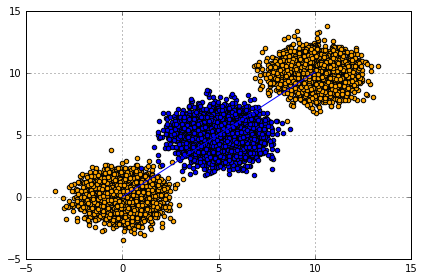

In [36]:
plt.scatter(c1_xs,c1_ys,c=orange)
plt.scatter(c2_xs,c2_ys,c=blue)

line1_xs = np.linspace(0,10,20)
line1_ys = (weights[0,0]/weights[1,0])*line1_xs

plt.plot(line1_xs,line1_ys)

plt.grid('on')
plt.tight_layout()

plt.show()